In [1]:
import numpy as np
import matplotlib.pyplot as plt

#declare constants
dt = 0.01
tf = 10
N = int(tf/dt)
A = .003 #amplitude, (m)
f0 = 11.13 #natural frequency of the robot, resonance frequency (hz)
f = f0*0.72 #chosen frequency, because article states optimal frequency is above or below f0, but not at f0 (hz)
phi = np.pi/2 #could also be (3pi/2)
ma = 1.003 #sum of the actuator and air bearing mass, (kg)
m = 1.178 #total mass, sum of actuator mass, air bearing mass, and thrust rod mass (kg)
k = 5.8 #spring constant (kN/m)
c = 0.01 * 2*np.sqrt(m*k)#derived from damping ratio equation
g = 9.81*0.276 #gravity (m/s)
alpha = 1 #either 1 or zero, and stands for the piecewise constant

#create a time array
t = np.linspace(0,tf,N+1)

#create two empty arrays
x = np.zeros(len(t))
y = np.zeros(len(t))

#define initial conditions
x[0] = 0
y[0] = 1


#define B (t) equation
def B(i):
    return -4*np.pi**2*A*f**2*np.sin(2*np.pi*f*i+phi)

#Create euler for loop to solve system of ODEs
for i in range(1,len(t)):
    if x[i-1]<0:
        alpha = 1
    else:
        alpha = 0
    x[i] = x[i-1] + dt*(y[i-1])
    y[i] = y[i-1] + dt*((-B(i-1)*(ma/m))-alpha*((y[i-1]*(c/m))+(x[i-1]*(k/m)))-g)

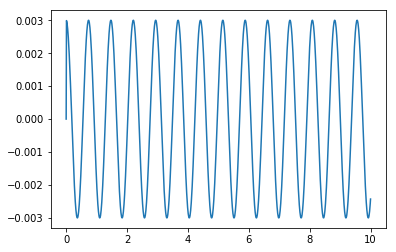

In [2]:
xa = np.zeros(len(t))
for i in range(1,len(t)):
    xa[i]=A*np.sin(2*np.pi*f*i+phi)
plt.plot(t,xa)

Text(0,0.5,'Robot Position (m)')

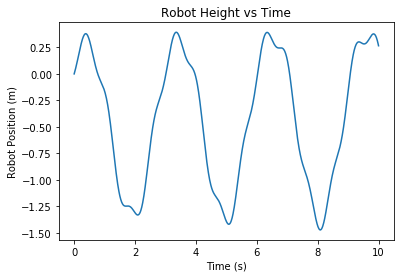

In [3]:
#plot graph 1
plt.plot(t,x)
plt.title("Robot Height vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Robot Position (m)")

Text(0,0.5,'Robot Velocity (m/s)')

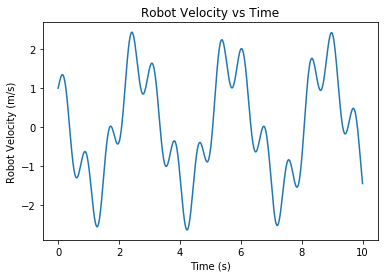

In [4]:
#plot graph 2
plt.plot(t,y)
plt.title("Robot Velocity vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Robot Velocity (m/s)")

Text(0,0.5,'Robot Position (m)')

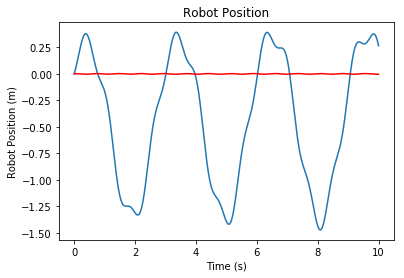

In [5]:
#plot graph 1
plt.plot(t,x)
plt.plot(t,xa,'r')
plt.title("Robot Position")
plt.xlabel("Time (s)")
plt.ylabel("Robot Position (m)")